In [296]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import re
from sklearn import metrics
from sklearn.cluster import DBSCAN


from scipy.stats import entropy

import warnings
warnings.filterwarnings('ignore')

Conclusions:
- na

In [37]:
file = 'anonymized-curriculum-access.txt'
log = pd.read_csv(file,names =['date', 'time','path','id','mystery','ip'], sep = ' ', parse_dates = True)
log['datetime'] = pd.to_datetime(log.date+' '+log.time)
log.set_index('datetime',inplace = True)
log.head()

,date,time,path,id,mystery,ip
datetime,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


identify cohorts

In [38]:
local_log = log[(log.ip == '97.105.19.61')|(log.ip =='97.105.19.58')]

In [95]:
log_start = log.index.min()
people = log.id.unique()
start_end_dates = pd.DataFrame(columns=['id','start_date','end_date', 'range'])
for person in people:
    start_date = (local_log[local_log.id == person].index.min()-log_start).days
    end_date = (local_log[local_log.id == person].index.max()-log_start).days
    date_range = end_date-start_date
    start_end_dates = start_end_dates.append({'id': person, 'start_date': start_date, 'end_date':end_date, 'range':date_range}, ignore_index = True)
start_end_dates

,id,start_date,end_date,range
0,1,0,661,661
1,2,0,104,104
2,3,0,108,108
3,4,0,60,60
4,5,0,98,98
5,6,0,111,111
6,7,0,108,108
7,8,0,47,47
8,9,0,105,105
9,10,0,16,16


In [96]:
current_staff_student = start_end_dates[~start_end_dates.start_date.isna()]

In [253]:
dbscan = DBSCAN(eps = 10, min_samples=10, metric = 'euclidean')
group = dbscan.fit_predict(current_staff_student[['start_date', 'range']])
current_staff_student['group'] = group#.astype(str)

In [254]:
current_staff_student.group.value_counts()

-1     153
 14     28
 13     24
 3      21
 11     20
 7      20
 0      20
 12     19
 6      18
 1      16
 10     15
 9      15
 5      15
 8      12
 4      12
 2      11
Name: group, dtype: int64

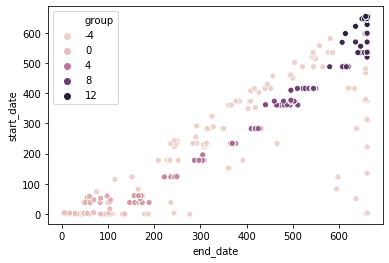

In [252]:
sns.scatterplot(data = current_staff_student[['start_date','end_date']], y = 'start_date', x = 'end_date', hue = current_staff_student.group, )#palette=['grey']+['red','blue']*6+['red'])


In [188]:
local_log.mystery.value_counts()

24.0    26475
33.0    25872
29.0    24141
32.0    20763
23.0    20709
22.0    20200
26.0    20094
28.0    17861
25.0    17394
31.0    17390
27.0    15868
34.0    12070
51.0     9415
1.0      7573
14.0     6525
21.0     2814
52.0     2169
17.0     2097
8.0      1354
16.0      423
18.0      362
7.0        86
15.0       78
19.0       55
13.0       31
Name: mystery, dtype: int64

In [221]:
log.mystery.value_counts()

29.0    35969
24.0    35039
33.0    34433
22.0    28875
23.0    28056
32.0    26801
26.0    26760
25.0    25233
31.0    22665
28.0    20677
27.0    20198
34.0    15519
51.0    10835
14.0     9069
1.0      8877
21.0     7181
17.0     3792
52.0     2896
13.0     2610
8.0      1671
18.0     1603
19.0     1142
16.0      740
15.0      691
7.0       461
12.0      270
11.0      204
2.0        93
6.0        72
9.0         5
4.0         4
Name: mystery, dtype: int64

Find most common words among groups

In [256]:
log.mystery.value_counts()

29.0    35969
24.0    35039
33.0    34433
22.0    28875
23.0    28056
32.0    26801
26.0    26760
25.0    25233
31.0    22665
28.0    20677
27.0    20198
34.0    15519
51.0    10835
14.0     9069
1.0      8877
21.0     7181
17.0     3792
52.0     2896
13.0     2610
8.0      1671
18.0     1603
19.0     1142
16.0      740
15.0      691
7.0       461
12.0      270
11.0      204
2.0        93
6.0        72
9.0         5
4.0         4
Name: mystery, dtype: int64

In [277]:
web_dev_words = log[log.mystery == 29].path.str.split('/').sum()

In [295]:
web_dev_words= [x for x in web_dev_words if x != '']
pd.Series(web_dev_words).value_counts()

javascript-i                     5543
mysql                            4613
html-css                         3738
jquery                           3331
spring                           3048
java-iii                         2778
java-ii                          2713
javascript-ii                    2471
java-i                           2195
fundamentals                     2019
introduction                     1922
toc                              1294
css-ii                           1185
css-i                            1112
appendix                         1099
bom-and-dom                       969
relationships                     911
arrays                            811
events                            721
examples                          683
search                            673
search_index.json                 673
ajax                              615
clauses                           523
functions                         516
essential-methods                 500
objects     

In [311]:
web_dev_words = log[log.mystery == 29].path.apply(lambda x: re.split('\W|\_|\d', x)).sum()

In [315]:
web_dev_words= [x for x in web_dev_words if (x != '')&(x != 'i')&(x !='ii')&(x!='iii')]
pd.Series(web_dev_words).value_counts()

javascript         8691
java               8156
css                6745
mysql              4619
html               4597
and                4182
jquery             3331
spring             3048
introduction       2514
fundamentals       2036
dom                1533
events             1512
search             1346
bom                1326
toc                1294
appendix           1099
ajax               1028
relationships       911
variables           889
types               870
arrays              811
methods             786
json                779
bootstrap           716
selectors           689
examples            683
with                682
index               673
api                 602
statements          594
                   ... 
extraction            2
management            2
regression            1
Means                 1
seaborn               1
e                     1
layout                1
arghavan              1
visuals               1
df                    1
Page            

In [313]:
dat_sci_words = log[log.mystery == 34].path.apply(lambda x: re.split('\W|\_|\d', x)).sum()

In [318]:
dat_sci_words= [x for x in dat_sci_words if x not in  ['','i','ii','iii','to','or','and']]
pd.Series(dat_sci_words).value_counts()

python            2248
fundamentals      2153
regression        2034
sql               1819
overview          1761
stats             1556
classification    1348
data              1141
jpg               1092
clustering         949
appendix           940
intro              873
cli                754
storytelling       734
project            707
explore            674
timeseries         575
science            548
excel              521
prep               468
dataframes         455
search             448
more               427
functions          419
acquire            409
modern             389
scientist          389
ML                 387
AI                 387
timeline           387
                  ... 
hierarchical         2
multivariate         2
dbscan               2
svm                  2
ridge                2
end                  2
elements             2
angle                2
least                2
dendogram            2
templates            2
event                2
responses  